In [8]:
#Dependencies
import pandas as pd
import urllib.parse
from io import StringIO
import matplotlib.pyplot as plt
import glob
import datetime
import calendar
import time
import os
from data_utils import establish_nys_session
import warnings
warnings.filterwarnings('ignore')

In [9]:
folder_path = 'Ressources/'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []  # List to hold all dataframes

for file in files:
    file_path = os.path.join(folder_path, file)  # Full path to file
    df = pd.read_csv(file_path)  # Read the file into a DataFrame
    dataframes.append(df)  # Append the DataFrame to the list
    csv_files = glob.glob('path_to_your_directory/*.csv')

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Concatenate all DataFrames in the list into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng
0,2022-02-01,103 St (1),Manhattan,metrocard,5021,40.799446,-73.968376
1,2022-02-01,103 St (6),Manhattan,metrocard,5711,40.790600,-73.947479
2,2022-02-01,"103 St (C,B)",Manhattan,metrocard,1624,40.796093,-73.961456
3,2022-02-01,103 St-Corona Plaza (7),Queens,metrocard,9449,40.749866,-73.862701
4,2022-02-01,104 St (A),Queens,metrocard,835,40.681709,-73.837685
...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040


FINDING THE TOTAL REVENUE PER BOROUGH OVER A SPECIFIED TIME (2022 - PRESENT).

In [10]:
files = glob.glob('ressources/*.csv')

# storing the combined data
combined_df = pd.DataFrame()

# Looping through each CSV file
for file in files:
    ridership_df = pd.read_csv(file) #Loading
    
    # Group the data by borough
    # Adding total riderships across all files
    ridership_per_borough = ridership_df.groupby('borough')['total_ridership'].sum().reset_index()
    
    combined_df = pd.concat([combined_df, ridership_per_borough])

# calculating total revenue
final_result = combined_df.groupby('borough')['total_ridership'].sum().reset_index()

# Calculate total revenue per borough from 2022 - present
final_result['revenue'] = final_result['total_ridership'] * 2.90

# 0 decimal places
final_result['total_ridership'] = final_result['total_ridership'].astype(int)
final_result['revenue'] = final_result['revenue'].astype('int64')
# results
display(final_result)

,borough,total_ridership,revenue
0,Bronx,178683359,518181741
1,Brooklyn,545048838,1580641630
2,Manhattan,1324959487,3842382512
3,Queens,362746426,1051964635
4,Staten Island,4343766,12596921


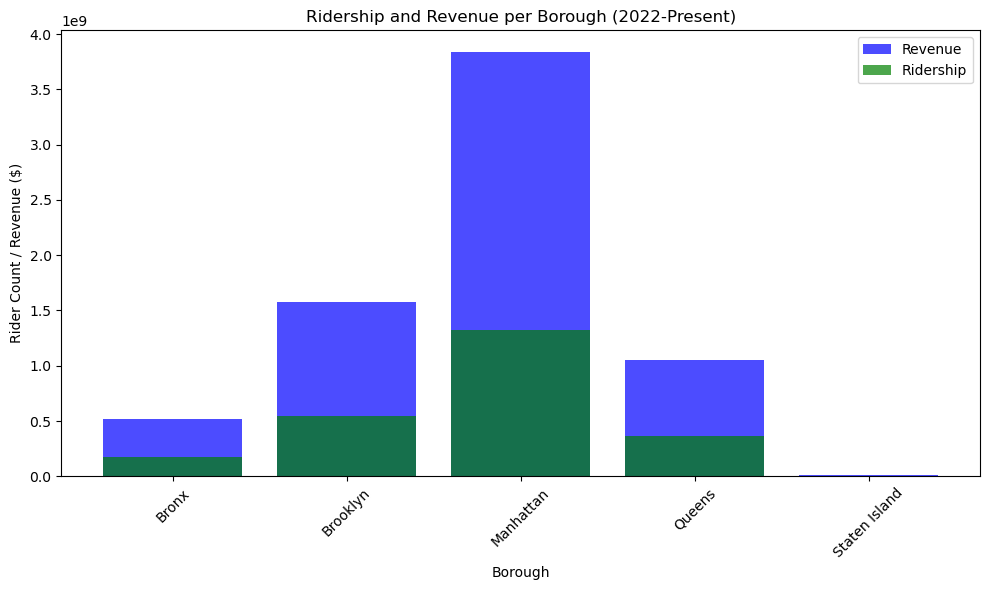

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(final_result['borough'], final_result['revenue'], color='blue', alpha=0.7, label='Revenue')
plt.bar(final_result['borough'], final_result['total_ridership'], color='green', alpha=0.7, label='Ridership')
plt.xlabel('Borough')
plt.ylabel('Rider Count / Revenue ($)')
plt.title('Ridership and Revenue per Borough (2022-Present)')
plt.legend()
plt.xticks(final_result['borough'], rotation=45)  
plt.tight_layout()
plt.show()

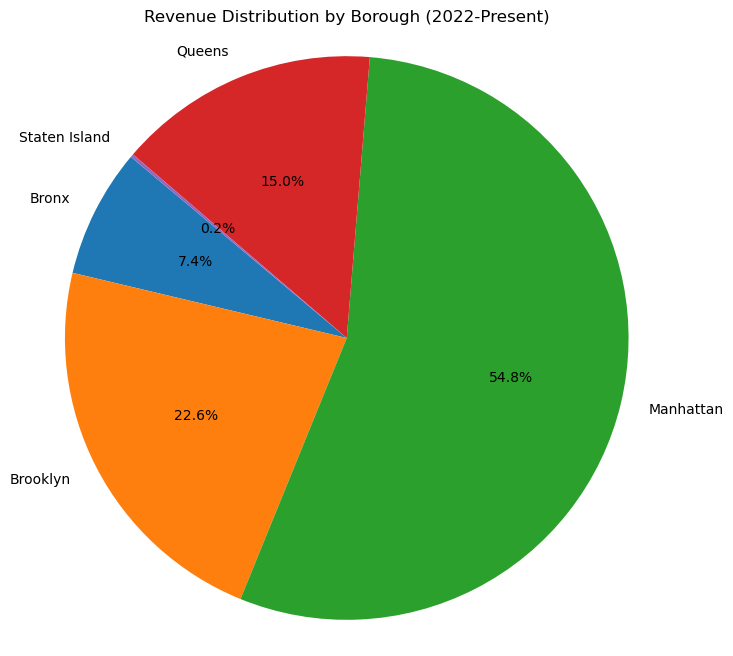

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(final_result['revenue'], labels=final_result['borough'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Revenue Distribution by Borough (2022-Present)')
plt.show()

In [13]:
csv_files = glob.glob('ressources/*.csv')

# Initialize and store
combined_df = pd.DataFrame()

for file in csv_files: # Iterate using for loop
    ridership_df = pd.read_csv(file)
    
    # Grouping data
    # sum of the ridership from 2022 - present
    ridership_per_borough = ridership_df.groupby('borough')['total_ridership'].sum().reset_index()
    
    combined_df = pd.concat([combined_df, ridership_per_borough])

# calculate total revenue 
# And number of periods
final_result = combined_df.groupby('borough')['total_ridership'].agg(['sum', 'count']).reset_index()

# Calculate average revenue per borough
final_result['average_revenue'] = final_result['sum'] * 2.90 / final_result['count']

# Format the average revenue
# removing decimels 
final_result['average_revenue'] = final_result['average_revenue'].astype('int64')  # or 'float'
final_result.rename(columns={'sum': 'total_ridership'}, inplace=True)
# Print
display(final_result[['borough', 'total_ridership', 'average_revenue']])

,borough,total_ridership,average_revenue
0,Bronx,178683359,172727247
1,Brooklyn,545048838,526880543
2,Manhattan,1324959487,1280794170
3,Queens,362746426,350654878
4,Staten Island,4343766,4198973


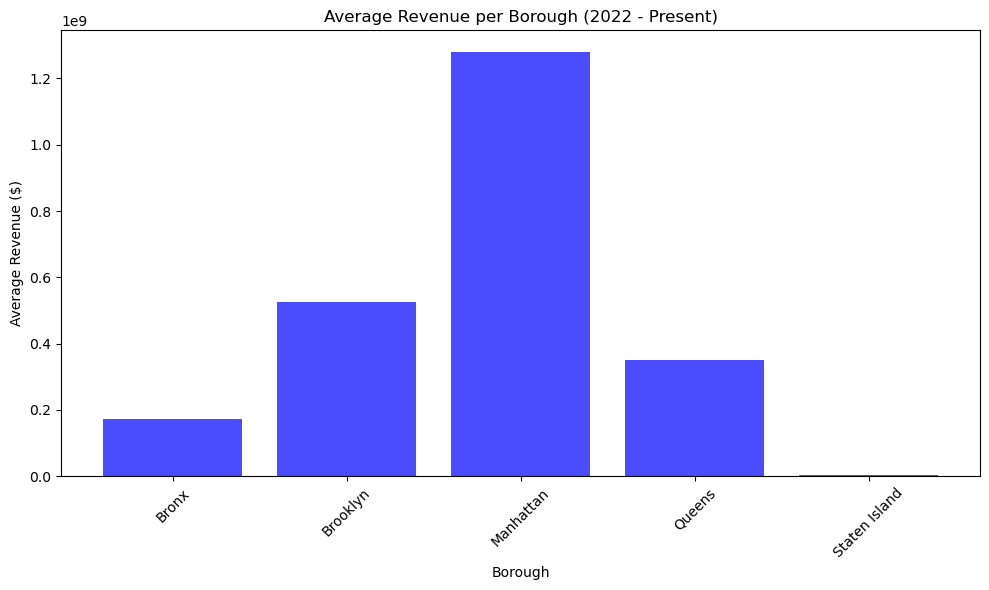

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(final_result['borough'], final_result['average_revenue'], color='blue', alpha=0.7)
plt.xlabel('Borough')
plt.ylabel('Average Revenue ($)')
plt.title('Average Revenue per Borough (2022 - Present)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()